In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load Wine dataset
wine = load_wine()

# print the label species(setosa, versicolor , virginica )
print(wine.target_names)
df.head()

['class_0' 'class_1' 'class_2']


NameError: name 'df' is not defined

In [4]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)
print(wine.feature_names)
print(f"Number of Rows: {df.shape[0]}")

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Number of Rows: 178


In [5]:
# Add target column
df["target"] = wine.target

# Split Data (80% Train, 20% Test)
X = df.iloc[:, :-1]  # Select all columns except target
y = df["target"]      # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Ensemble Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train & Evaluate Each Model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 1.0000
Bagging Accuracy: 0.9722
AdaBoost Accuracy: 0.9167


D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting Accuracy: 0.9444


In [6]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Voting Classifier (Hard Voting)
voting_clf = VotingClassifier(
    estimators=[
        ("Random Forest", models["Random Forest"]),
        ("Bagging", models["Bagging"]),
        ("AdaBoost", models["AdaBoost"]),
        ("Gradient Boosting", models["Gradient Boosting"]),
    ],
    voting="hard"  # Majority voting
)

# Train and evaluate Voting Classifier
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Voting Classifier Accuracy: 0.9722


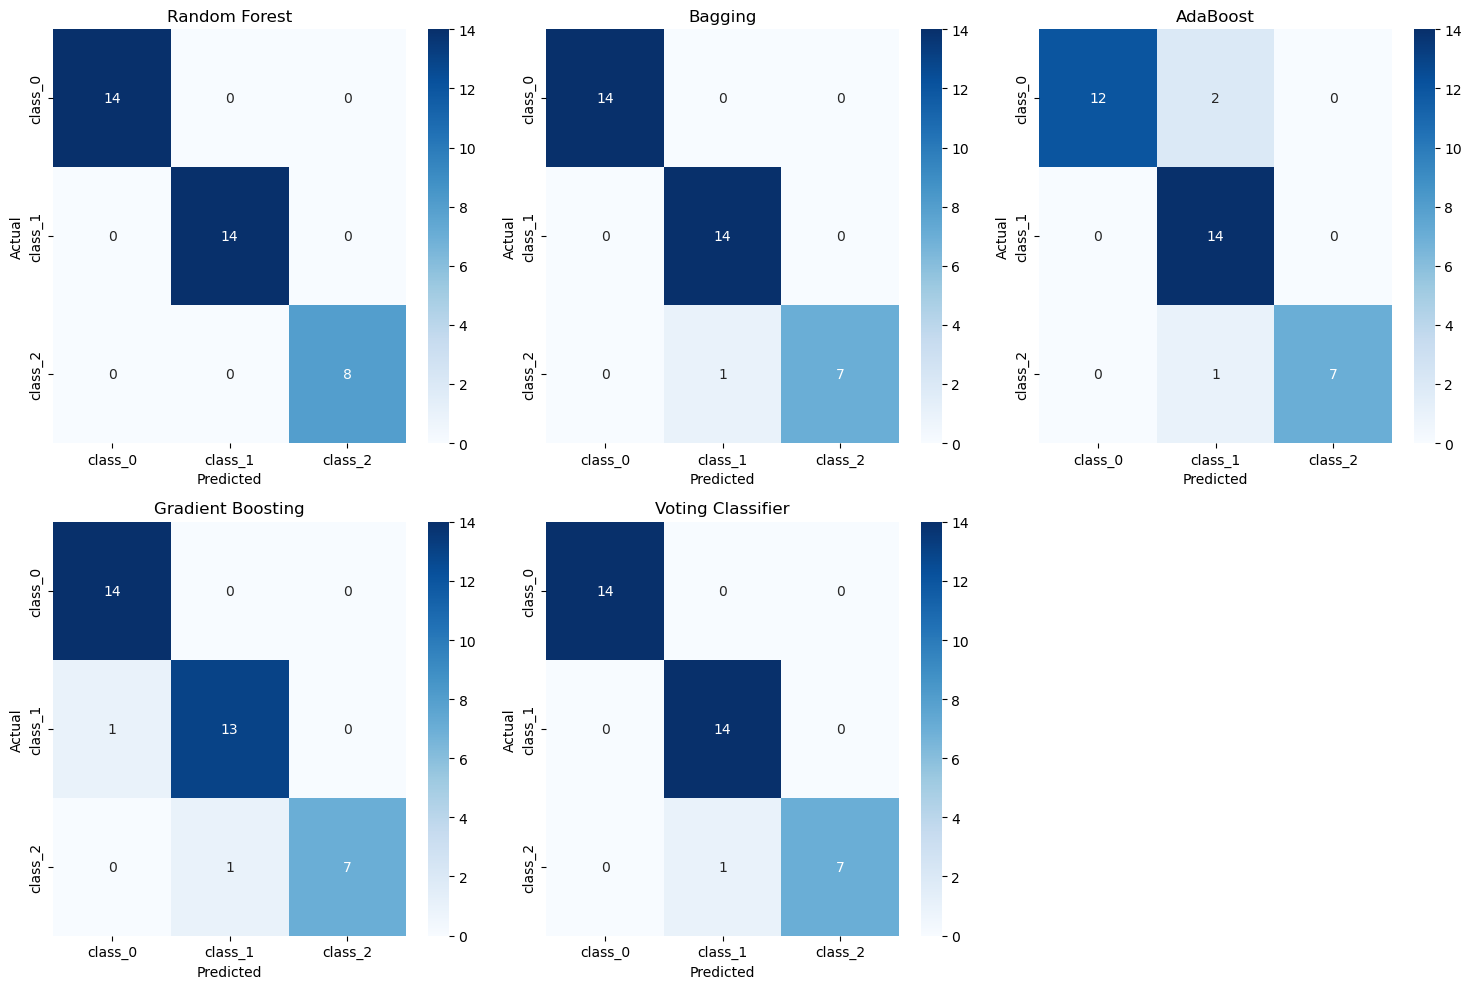

In [16]:
# Create subplots: 2 rows, 3 columns (for 5 models)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten axes for easy indexing
axes = axes.flatten()

# Generate and plot confusion matrices for each model
for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=wine.target_names, 
                yticklabels=wine.target_names, ax=axes[idx])
    axes[idx].set_title(f"{name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Add Voting Classifier as the 5th model
y_pred_voting = voting_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=wine.target_names, 
            yticklabels=wine.target_names, ax=axes[4])
axes[4].set_title("Voting Classifier")
axes[4].set_xlabel("Predicted")
axes[4].set_ylabel("Actual")

# Hide the 6th subplot (since we only have 5 models)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()